In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import trange, tqdm

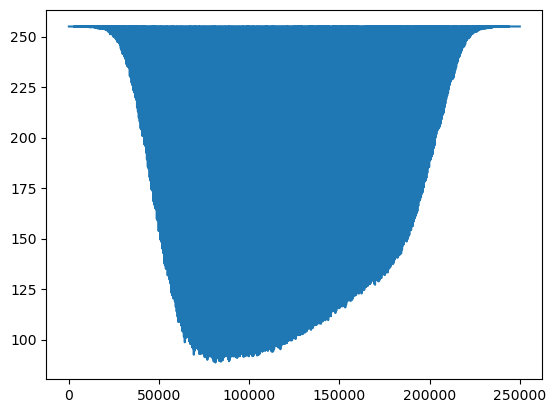

In [10]:
image_path = 'C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/GreenBit_FL/Fake' #GreenBit - fake
img_list = os.listdir(image_path)

avg = []

for i in img_list :
    img = cv2.imread('C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/GreenBit_FL/Fake/' + i, cv2.IMREAD_GRAYSCALE)
    img = np.array(img.reshape(500*500))
    avg.append(img)

avg = np.array(avg)

pixel_mean = avg.mean(axis = 0)

plt.plot(range(250000), pixel_mean)
plt.show()

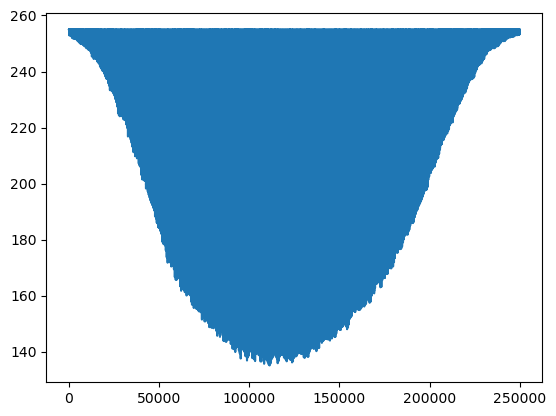

In [11]:
image_path = 'C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/GreenBit_FL/Live' #GreenBit - live
img_list = os.listdir(image_path)

avg = []

for i in img_list :
    img = cv2.imread('C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/GreenBit_FL/Live/' + i, cv2.IMREAD_GRAYSCALE)
    img = np.array(img.reshape(500*500))
    avg.append(img)

avg = np.array(avg)

pixel_mean = avg.mean(axis = 0)

plt.plot(range(250000), pixel_mean)
plt.show()

In [17]:
image_path = 'C:/Users/user/PycharmProjects/Fake_fingerprint_detection/Greenbit/data' #GreemBit
img_list = os.listdir(image_path)

arr = []
count = 0
for i in img_list:
    img = cv2.imread('C:/Users/user/PycharmProjects/Fake_fingerprint_detection/Greenbit/data/' + i, cv2.IMREAD_GRAYSCALE)
    img = img.reshape(500*500)
    arr.append(img)
    
    count += 1

data_arr = []
value = []
for i in tqdm(arr):
    data_value = np.unique(i, return_counts=True)
    dv_0 = data_value[0].tolist()
    dv_1 = data_value[1].tolist()
    value.append(dv_1)
    di = {str(j): 0 for j in dv_0}

    for k in range(len(dv_1)):
        di[str(k)] = dv_1[k]
    data_arr.append(di)

df = pd.DataFrame(data_arr)

100%|██████████| 2749/2749 [00:08<00:00, 309.92it/s]


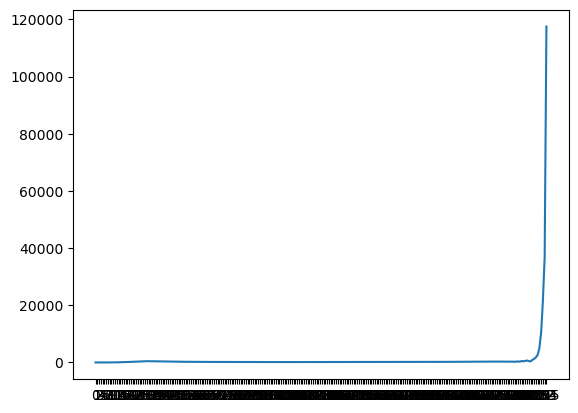

In [18]:
Green_fake_mean = df[:1500].mean()
plt.plot(Green_fake_mean)

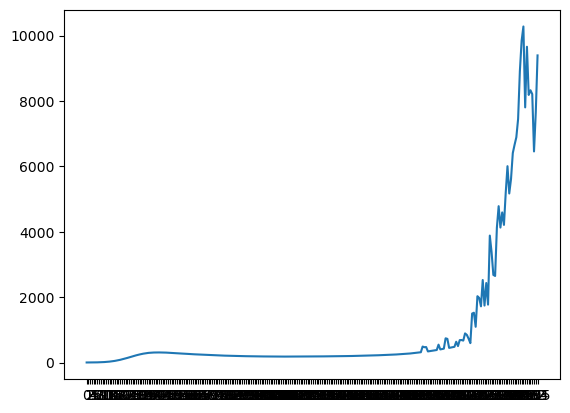

In [19]:
Green_fake_mean = df[1500:].mean()
plt.plot(Green_fake_mean)

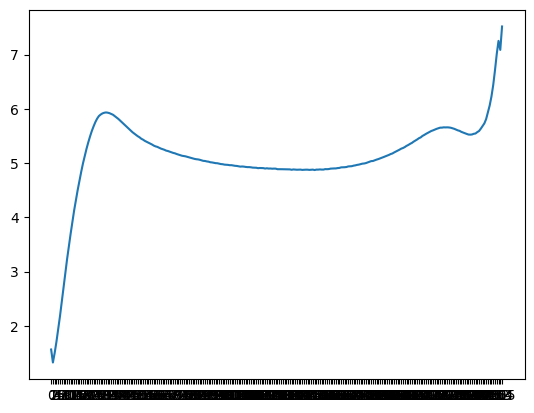

In [20]:
Green_live_mean = np.log1p(df[:1500]).mean()
plt.plot(Green_live_mean)

(array([  6.,   5.,   5.,   4.,   5.,   5.,   8.,  12., 161.,  45.]),
 array([0.73451849, 1.27311182, 1.81170515, 2.35029848, 2.88889181,
        3.42748514, 3.96607847, 4.5046718 , 5.04326513, 5.58185846,
        6.12045178]),
 <BarContainer object of 10 artists>)

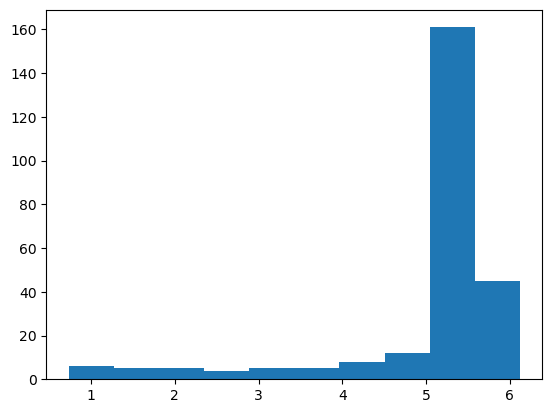

In [21]:
Green_fake_mean = np.log1p(df[1500:]).mean()
plt.hist(Green_fake_mean)